In [14]:
import numpy as np
from wipy.wipy_utils import utils
import scipy
from matplotlib import pyplot as plt

In [15]:
# load borehole logs


BH1 = np.loadtxt('Field-Data/Borehole_Logs/BW7SonicVels.csv', delimiter=',', skiprows=2)
BH2 = np.loadtxt('Field-Data/Borehole_Logs/BW8_SonicVels.csv', delimiter=',', skiprows=2)

BH1[BH1 < 0] = np.nan
BH2[BH2 < 0] = np.nan

x_1 = 58.6
z_1 = 2475.35
x_2 = 78.6
z_2 = 2476.51


In [16]:
# load velocity models

model1_path = "model_init"
model2_path = "OUTPUT/model_0003"
pars = ["x", "z", "rho", "vp", "vs"]
model1 = utils.load_model(model1_path, pars)
model2 = utils.load_model(model2_path, ["vp", "vs"])
model2["x"] = model1["x"]
model2["z"] = model1["z"]

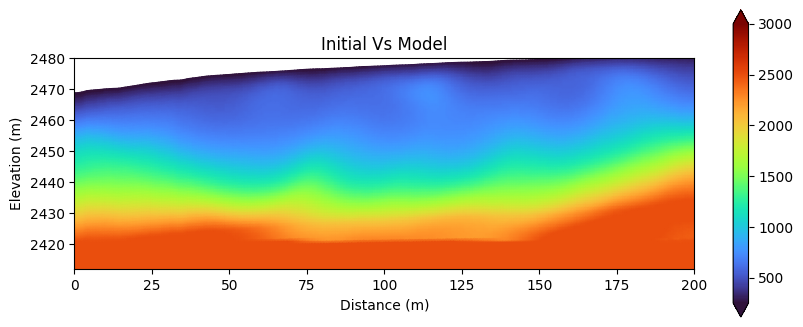

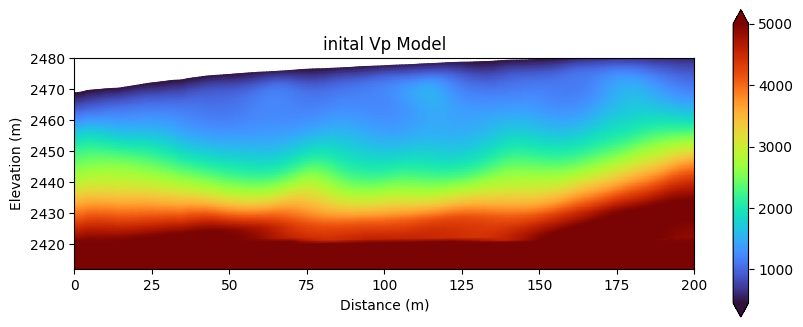

In [17]:
fig, ax = utils.plot_model(model1, 25, "vs", bounds=[250, 3000])
ax.set_xlim([0, 200])
ax.set_ylim([2412, 2480])
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Elevation (m)")
ax.set_title("Initial Vs Model")

output_path = "Figures/Vs_init.pdf"
# plt.savefig(output_path, format="pdf", dpi=300, bbox_inches='tight') 

plt.show()

fig, ax = utils.plot_model(model1, 25, "vp", bounds=[450, 5000])
ax.set_xlim([0, 200])
ax.set_ylim([2412, 2480])
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Elevation (m)")
ax.set_title("inital Vp Model")

output_path = "Figures/Vp_init.pdf"
# plt.savefig(output_path, format="pdf", dpi=300, bbox_inches='tight') 

plt.show()

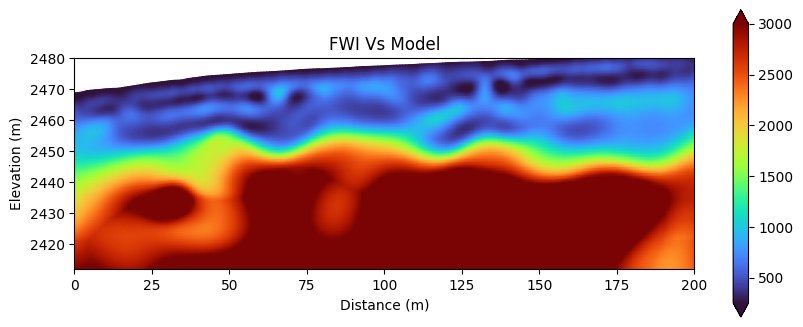

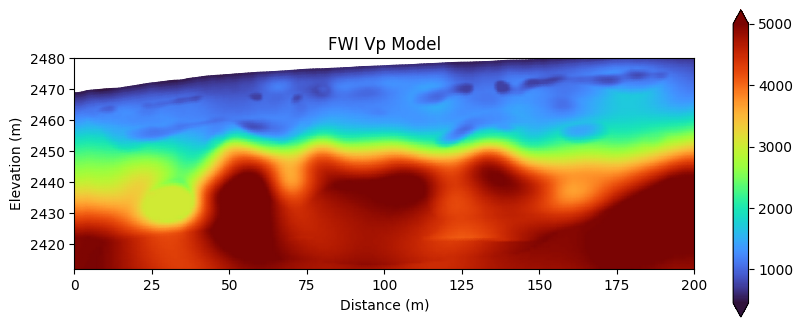

In [18]:
fig, ax = utils.plot_model(model2, 25, "vs", bounds=[250, 3000])
ax.set_xlim([0, 200])
ax.set_ylim([2412, 2480])
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Elevation (m)")
ax.set_title("FWI Vs Model")

output_path = "Figures/Vs_final.pdf"
# plt.savefig(output_path, format="pdf", dpi=300, bbox_inches='tight') 

plt.show()

fig, ax = utils.plot_model(model2, 25, "vp", bounds=[450, 5000])
ax.set_xlim([0, 200])
ax.set_ylim([2412, 2480])
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Elevation (m)")
ax.set_title("FWI Vp Model")

output_path = "Figures/Vp_final.pdf"
# plt.savefig(output_path, format="pdf", dpi=300, bbox_inches='tight') 

plt.show()


Text(0.5, 1.0, 'FWI Vp:Vs Model')

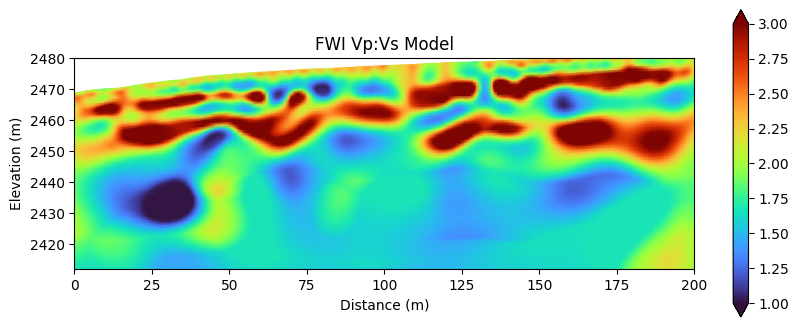

In [19]:
model2["vp:vs"] = model2["vp"] / model2["vs"]

fig, ax = utils.plot_model(model2, 25, "vp:vs", bounds=[1, 3], cmap="turbo")
ax.set_xlim([0, 200])
ax.set_ylim([2412, 2480])
ax.set_xlabel("Distance (m)")
ax.set_ylabel("Elevation (m)")
ax.set_title("FWI Vp:Vs Model")

# output_path = "Figures/Vp-Vs_final.pdf"
# plt.savefig(output_path, format="pdf", dpi=300, bbox_inches='tight') 

# plt.show()

# fig, ax = utils.plot_model(model1, 25, "vp", bounds=[450, 5000], cmap="turbo")
# ax.set_xlim([0, 200])
# ax.set_ylim([2412, 2480])
# ax.set_xlabel("Distance (m)")
# ax.set_ylabel("Elevation (m)")
# ax.set_title("FATT Vp Model")

# output_path = "Figures/Vp_FATT.pdf"
# plt.savefig(output_path, format="pdf", dpi=300, bbox_inches='tight') 

# plt.show()


In [11]:
m1_vs_interp = scipy.interpolate.LinearNDInterpolator(points=list(zip(model1["x"], model1["z"])), values=model1["vs"])
m2_vs_interp = scipy.interpolate.LinearNDInterpolator(points=list(zip(model2["x"], model2["z"])), values=model2["vs"])

m1_vp_interp = scipy.interpolate.LinearNDInterpolator(points=list(zip(model1["x"], model1["z"])), values=model1["vp"])
m2_vp_interp = scipy.interpolate.LinearNDInterpolator(points=list(zip(model2["x"], model2["z"])), values=model2["vp"])

d1 = np.arange(2412, z_1, 0.1)
x1 = np.ones(len(d1)) * x_1

d2 = np.arange(2412, z_2, 0.1)
x2 = np.ones(len(d2)) * x_2

# plt.plot(m1_interp(list(zip(x1, d1))), d1, "b", label="WE-FATT")
# plt.plot(m2_interp(list(zip(x1, d1))), d1, "r", label="RB-FATT")
# plt.plot(BH1[:,2], z_1 - BH1[:, 0], "k", label="Log")
# plt.legend()
# plt.show()



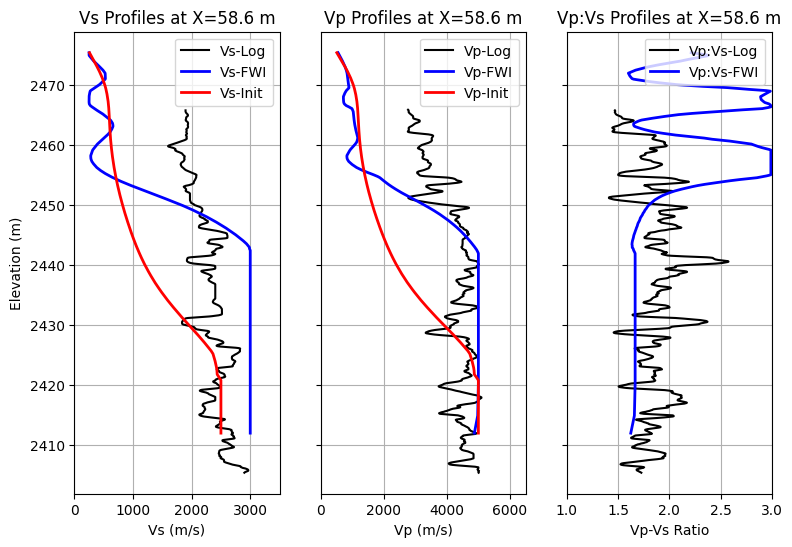

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(9, 6), sharey=True)

ax[0].plot(BH1[:,2], z_2 - BH1[:, 0], "k", label="Vs-Log")
ax[0].plot(m2_vs_interp(list(zip(x1, d1))), d1, "b", linewidth=2, label="Vs-FWI")
ax[0].plot(m1_vs_interp(list(zip(x1, d1))), d1, "r", linewidth=2, label="Vs-Init")
ax[0].set_xlim([0, 3500])
ax[0].grid()
ax[0].set_xlabel("Vs (m/s)")
ax[0].set_ylabel("Elevation (m)")
ax[0].set_title("Vs Profiles at X=58.6 m")
ax[0].legend()

ax[1].plot(BH1[:,1], z_2 - BH1[:, 0], "k", label="Vp-Log")
ax[1].plot(m2_vp_interp(list(zip(x1, d1))), d1, "b", linewidth=2, label="Vp-FWI")
ax[1].plot(m1_vp_interp(list(zip(x1, d1))), d1, "r", linewidth=2, label="Vp-Init")
ax[1].set_xlim([0, 6500])
ax[1].grid()
ax[1].set_xlabel("Vp (m/s)")
ax[1].set_title("Vp Profiles at X=58.6 m")
ax[1].legend()

ax[2].plot(BH1[:,1]/BH1[:,2], z_2 - BH1[:, 0], "k", label="Vp:Vs-Log")
ax[2].plot(m2_vp_interp(list(zip(x1, d1)))/m2_vs_interp(list(zip(x1, d1))), d1, "b", linewidth=2, label="Vp:Vs-FWI")
ax[2].set_xlim([1, 3])
ax[2].grid()
ax[2].set_xlabel("Vp-Vs Ratio")
ax[2].set_title("Vp:Vs Profiles at X=58.6 m")
ax[2].legend()

output_path = "Figures/BH1_logs.pdf"
# plt.savefig(output_path, format="pdf", dpi=300) 

plt.show()

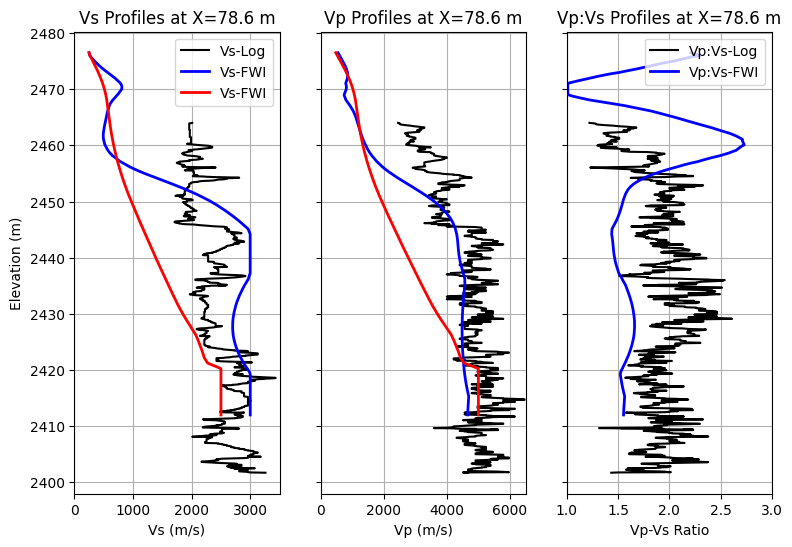

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(9, 6), sharey=True)

ax[0].plot(BH2[:,2], z_2 - BH2[:, 0], "k", label="Vs-Log")
ax[0].plot(m2_vs_interp(list(zip(x2, d2))), d2, "b", linewidth=2, label="Vs-FWI")
ax[0].plot(m1_vs_interp(list(zip(x2, d2))), d2, "r", linewidth=2, label="Vs-FWI")
ax[0].set_xlim([0, 3500])
ax[0].grid()
ax[0].set_xlabel("Vs (m/s)")
ax[0].set_ylabel("Elevation (m)")
ax[0].set_title("Vs Profiles at X=78.6 m")
ax[0].legend()

ax[1].plot(BH2[:,1], z_2 - BH2[:, 0], "k", label="Vp-Log")
ax[1].plot(m2_vp_interp(list(zip(x2, d2))), d2, "b", linewidth=2, label="Vp-FWI")
ax[1].plot(m1_vp_interp(list(zip(x2, d2))), d2, "r", linewidth=2, label="Vp-FATT")
ax[1].set_xlim([0, 6500])
ax[1].grid()
ax[1].set_xlabel("Vp (m/s)")
ax[1].set_title("Vp Profiles at X=78.6 m")

ax[2].plot(BH2[:,1]/BH2[:,2], z_2 - BH2[:, 0], "k", label="Vp:Vs-Log")
ax[2].plot(m2_vp_interp(list(zip(x2, d2)))/m2_vs_interp(list(zip(x2, d2))), d2, "b", linewidth=2, label="Vp:Vs-FWI")
ax[2].set_xlim([1, 3])
ax[2].grid()
ax[2].set_xlabel("Vp-Vs Ratio")
ax[2].set_title("Vp:Vs Profiles at X=78.6 m")
ax[2].legend()

output_path = "Figures/BH2_logs.pdf"
# plt.savefig(output_path, format="pdf", dpi=300) 

plt.show()



In [48]:
import obspy
import matplotlib

data_path0 = "Field-Data/Displacement-Data/000007/Uz_file_single_d.su"
data0 = obspy.read(data_path0, format="SU")

for trace in data0.traces:
    trace.data /= np.max(np.abs(trace.data))

data_path1 = "Field-Data/Displacement-Data/000007/Ux_file_single_d.su"
data1 = obspy.read(data_path1, format="SU")

for trace in data1.traces:
    trace.data /= np.max(np.abs(trace.data))

Nt = len(data0[0].data)
dt = data0.traces[0].stats.delta
T = np.arange(0, Nt*dt, dt)

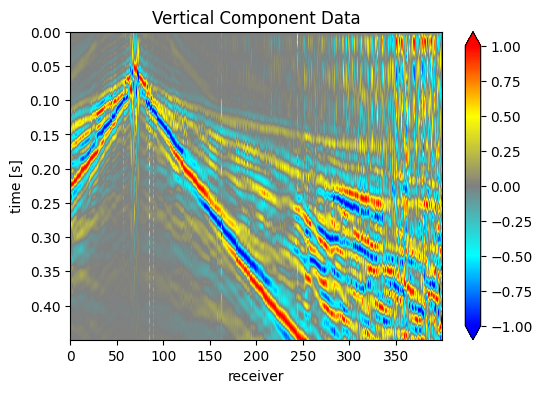

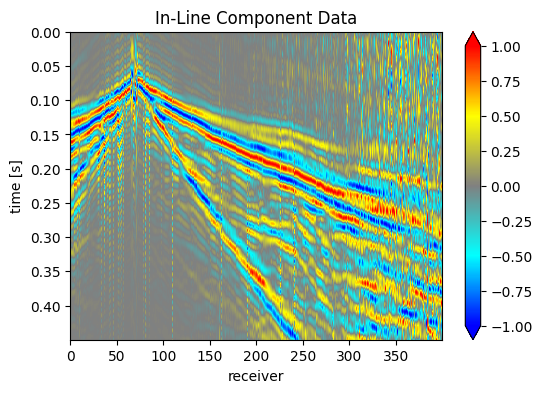

In [57]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", 
    ["blue", "cyan", "gray", "yellow", "red"])

fig, ax, = utils.plot_image(data0, 1, cmap=cmap)
ax.invert_yaxis()
ax.set_title("Vertical Component Data")

output_path = "Figures/Vertical_Comp_Data.png"
plt.savefig(output_path, format="png", dpi=300) 

plt.show()

fig, ax, = utils.plot_image(data1, 1, cmap=cmap)
ax.invert_yaxis()
ax.set_title("In-Line Component Data")

output_path = "Figures/In-Line_Comp_Data.png"
plt.savefig(output_path, format="png", dpi=300) 

plt.show()

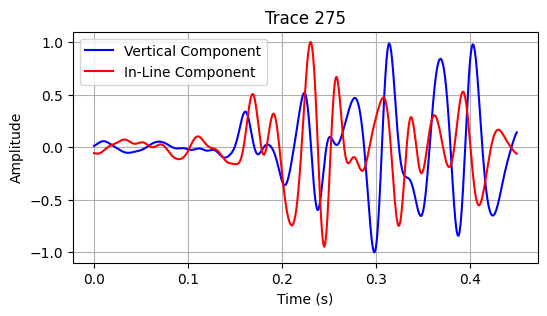

In [58]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
plt.plot(T, data0[275].data, label="Vertical Component", color="blue")
plt.plot(T, data1[275].data, label="In-Line Component", color="red")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
ax.set_title("Trace 275")
ax.grid()
ax.legend()

output_path = "Figures/Traces_Example.pdf"
plt.savefig(output_path, format="pdf", dpi=300) 

plt.show()
